In [1]:
#importing required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#importing dataset
df = pd.read_csv("/Users/Aman/New folder/bitcoin_price.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [4]:
#checking available features 
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [5]:
df.shape

(1556, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [8]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [9]:
df['Date']=df['Date'].astype('datetime64[ns]')
df['Date']

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [10]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [11]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [12]:
#checking for null values 
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [13]:
#checking for duplicate values 
df.duplicated().sum()

0

In [14]:
df1=df.sort_index(ascending=False).reset_index()

In [15]:
df1

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...,...
1551,4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [16]:
df1.drop('index',axis=1,inplace=True)

In [17]:
df1

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
1551,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


Lets plot various available features that are 'Open', 'High', 'Low', 'Close' , to see trends in bitcoin prices over the year 


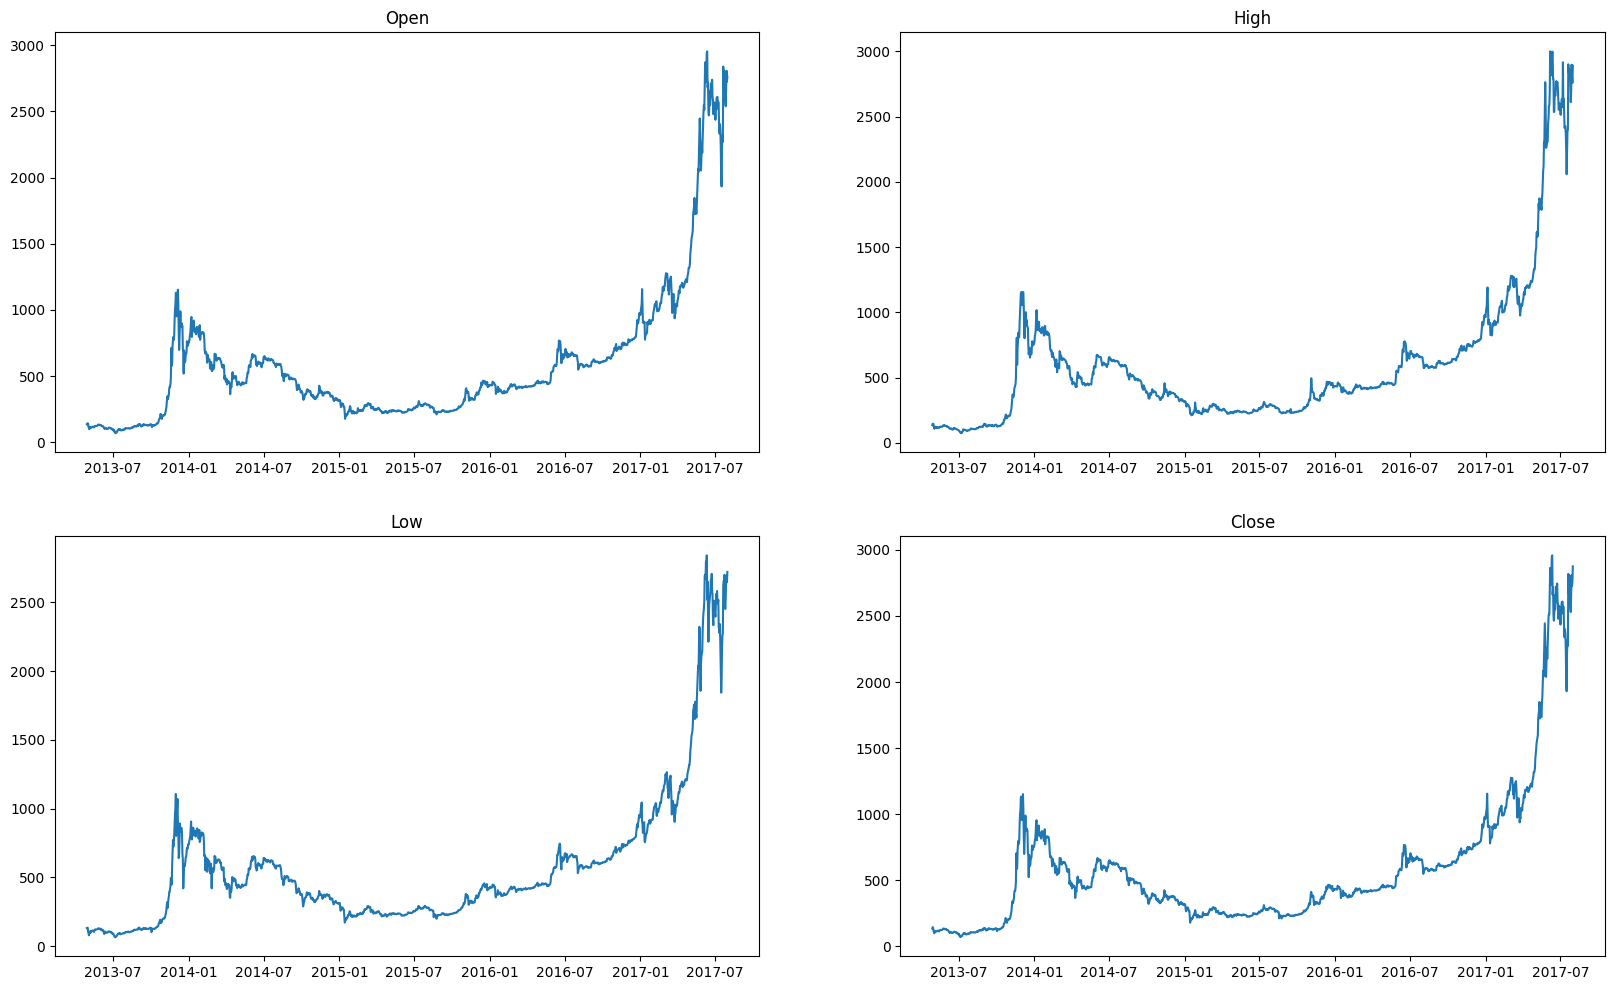

In [18]:
plt.figure(figsize=(20,12))
for index,col in enumerate(['Open', 'High', 'Low', 'Close'],1):
    plt.subplot(2,2,index)
    plt.plot(df1['Date'],df1[col])
    plt.title(col)

In [22]:
import chart_studio.plotly as py 
import plotly.graph_objs as go 
import plotly.express as px 
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

In [23]:
init_notebook_mode(connected=True)

# Explorartory Data Analysis

Lets try plotting Candle-stick chart for 2 different samples of our data to find some exciting insights from our data

FYI : Candle-stick chart have 4 parameters 
     open = to plot opening price of share 
     close= to plot closing price of share
     Low = to plot lowest price of share
     High = to plot highest price of share

In [27]:
df_sample = df1[0:50]

In [26]:
df_sample.info

<bound method DataFrame.info of          Date     Open     High      Low    Close         Volume  \
0  2017-07-31  2763.24  2889.62  2720.61  2875.34    860,575,000   
1  2017-07-30  2724.39  2758.53  2644.85  2757.18    705,943,000   
2  2017-07-29  2807.02  2808.76  2692.80  2726.45    803,746,000   
3  2017-07-28  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
4  2017-07-27  2538.71  2693.32  2529.34  2671.78    789,104,000   
5  2017-07-26  2577.77  2610.76  2450.80  2529.45    937,404,000   
6  2017-07-25  2757.50  2768.08  2480.96  2576.48  1,460,090,000   
7  2017-07-24  2732.70  2777.26  2699.19  2754.86    866,474,000   
8  2017-07-23  2808.10  2832.18  2653.94  2730.40  1,072,840,000   
9  2017-07-22  2668.63  2862.42  2657.71  2810.12  1,177,130,000   
10 2017-07-21  2838.41  2838.41  2621.85  2667.76  1,489,450,000   
11 2017-07-20  2269.89  2900.70  2269.89  2817.60  2,249,260,000   
12 2017-07-19  2323.08  2397.17  2260.23  2273.43  1,245,100,000   
13 2017-07-18  2

In [31]:
T=go.Candlestick(x=df_sample['Date'],
                 high=df_sample['High'],
                 open=df_sample['Open'],
                 close=df_sample['Close'],
                 low=df_sample['Low'])

In [37]:
candle=[T]
layout ={
    'title':'Bitcoin Historical Prices',
    'xaxis':{'title':'Date'},
    'yaxis':{'title':'Market Price ($)'}
              
}

In [38]:
go.Figure(data = candle,layout=layout)

In [39]:
df1_sample = df1[1500:1556]

In [40]:
F=go.Candlestick(x=df1_sample['Date'],
                 high=df1_sample['High'],
                 open=df1_sample['Open'],
                 close=df1_sample['Close'],
                 low=df1_sample['Low'])

In [41]:
candle1=[F]
layout ={
    'title':'Bitcoin Historical Prices',
    'xaxis':{'title':'Date'},
    'yaxis':{'title':'Market Price ($)'}
              
}

In [42]:
go.Figure(data = candle1,layout=layout)

# Conclusion of Candle Charts 

1. Prices of Bitcoin skyrocketed from year 2013 to year 2017
2. Highest and Lowest bitcoin prices for time period Jun 2017 to Jul 2017 were 2999.91 and 1843.03 USD respectively.
3. Similarly,Highest and Lowest bitcoin prices for time period Apr 2013 to Jun 2013  were 147.49 and 79.1 USD respectively.

In [43]:
df2 = df1.set_index('Date')

In [44]:
df2.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


# Plotting Non Scaled and Log Scaled graphs for different Features

Text(0.5, 1.0, 'Log SCaling')

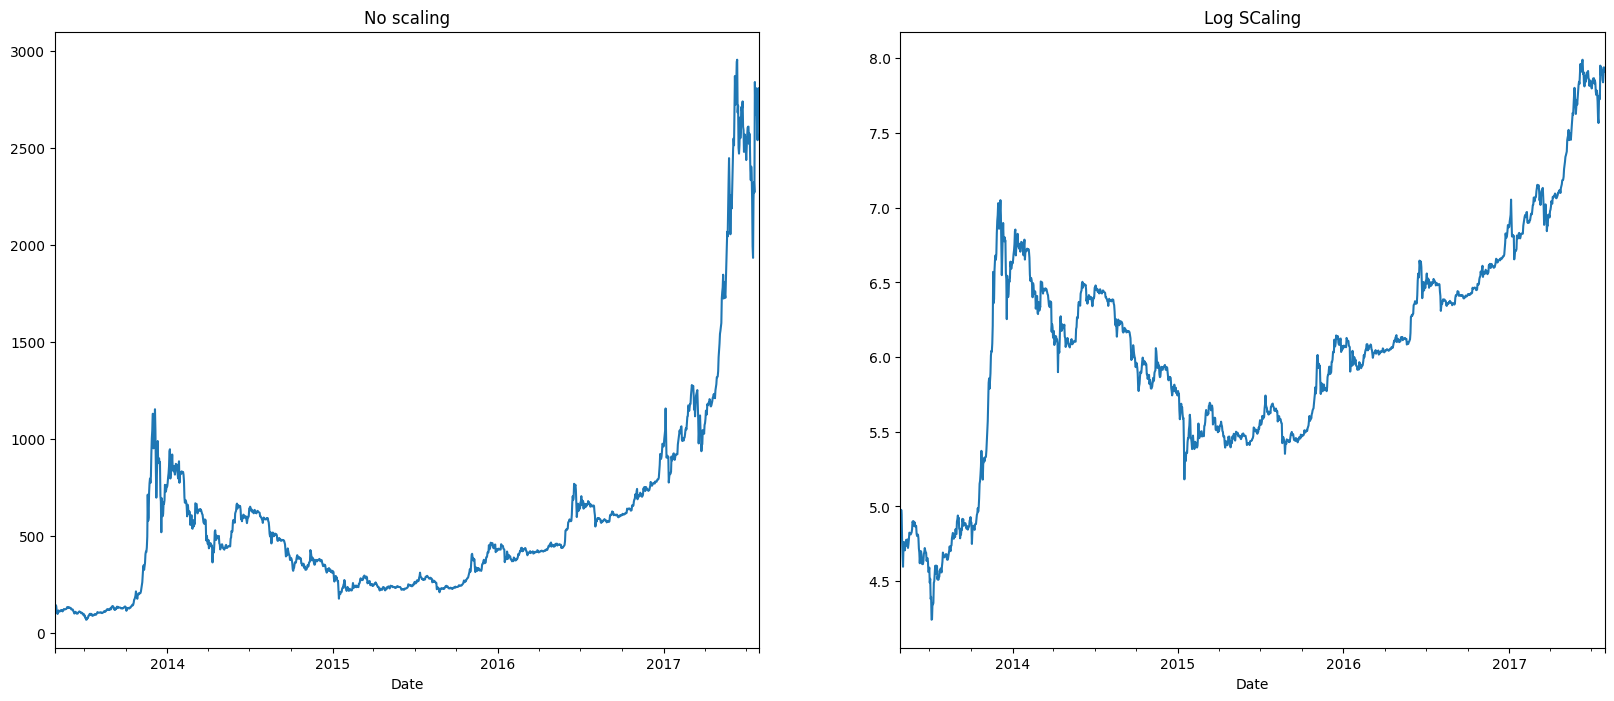

In [47]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df2['Open'].plot()
plt.title('No scaling')

plt.subplot(1,2,2)
np.log1p(df2['Open']).plot()
plt.title('Log SCaling')

Text(0.5, 1.0, 'Log SCaling')

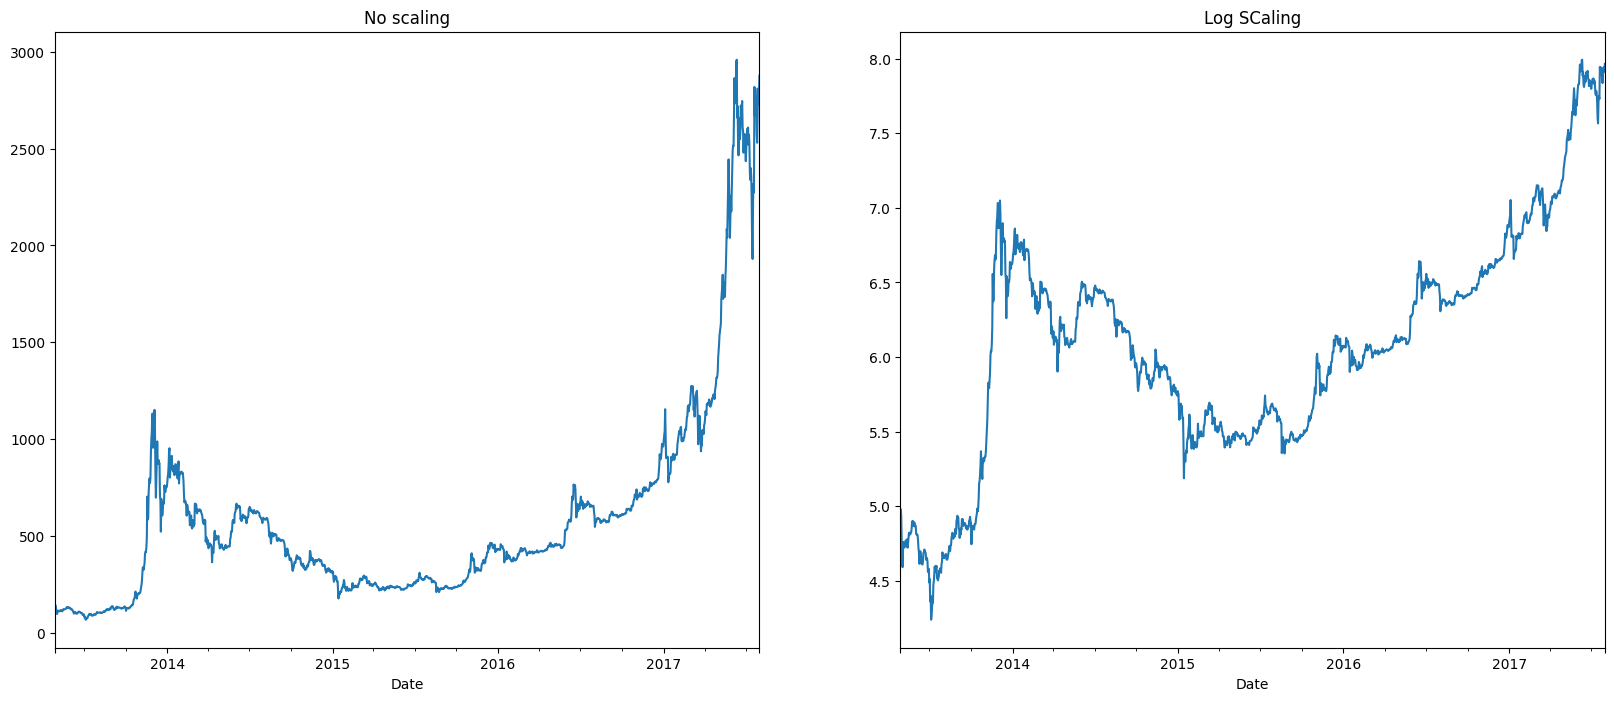

In [48]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df2['Close'].plot()
plt.title('No scaling')

plt.subplot(1,2,2)
np.log1p(df2['Close']).plot()
plt.title('Log SCaling')

Text(0.5, 1.0, 'Log SCaling')

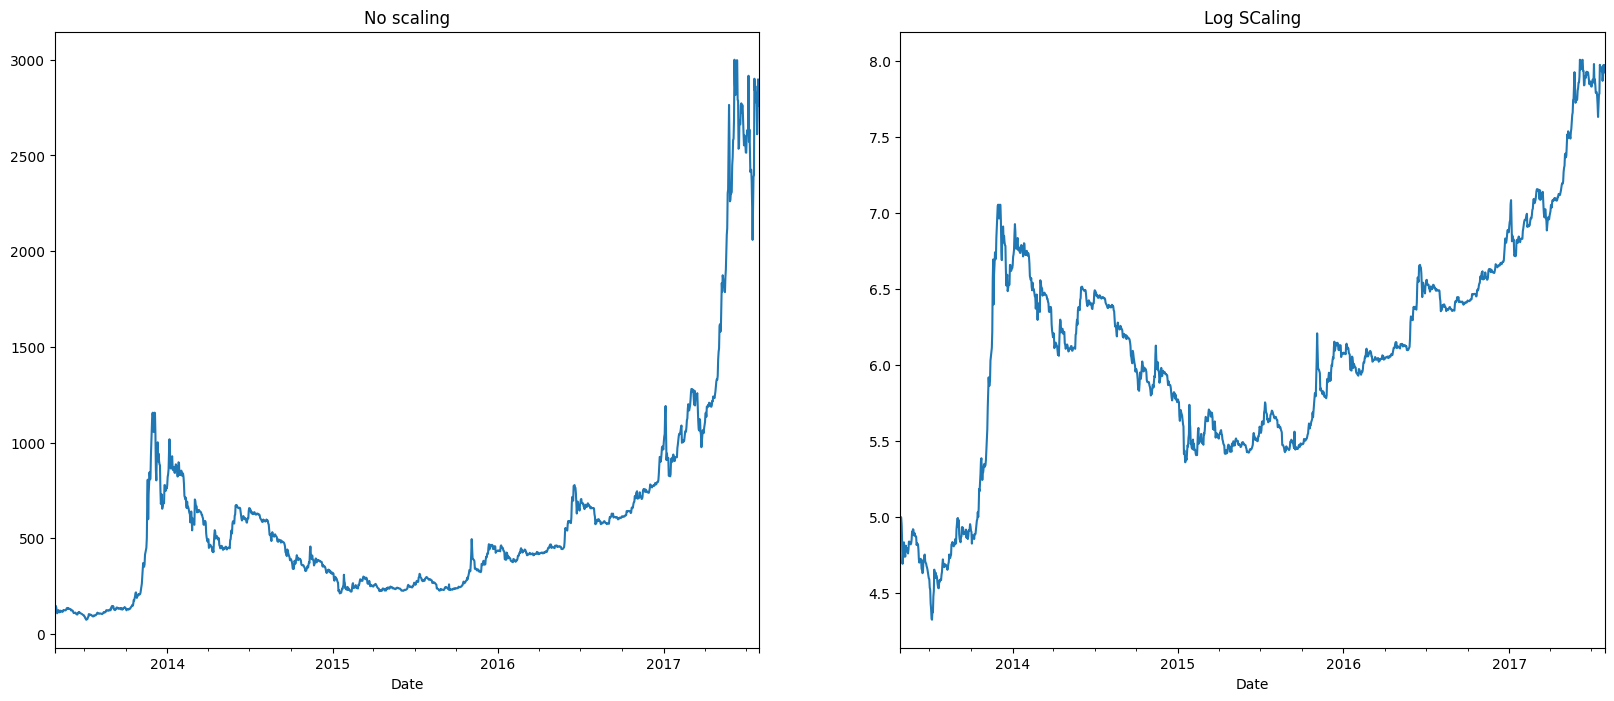

In [49]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df2['High'].plot()
plt.title('No scaling')

plt.subplot(1,2,2)
np.log1p(df2['High']).plot()
plt.title('Log SCaling')

Text(0.5, 1.0, 'Log SCaling')

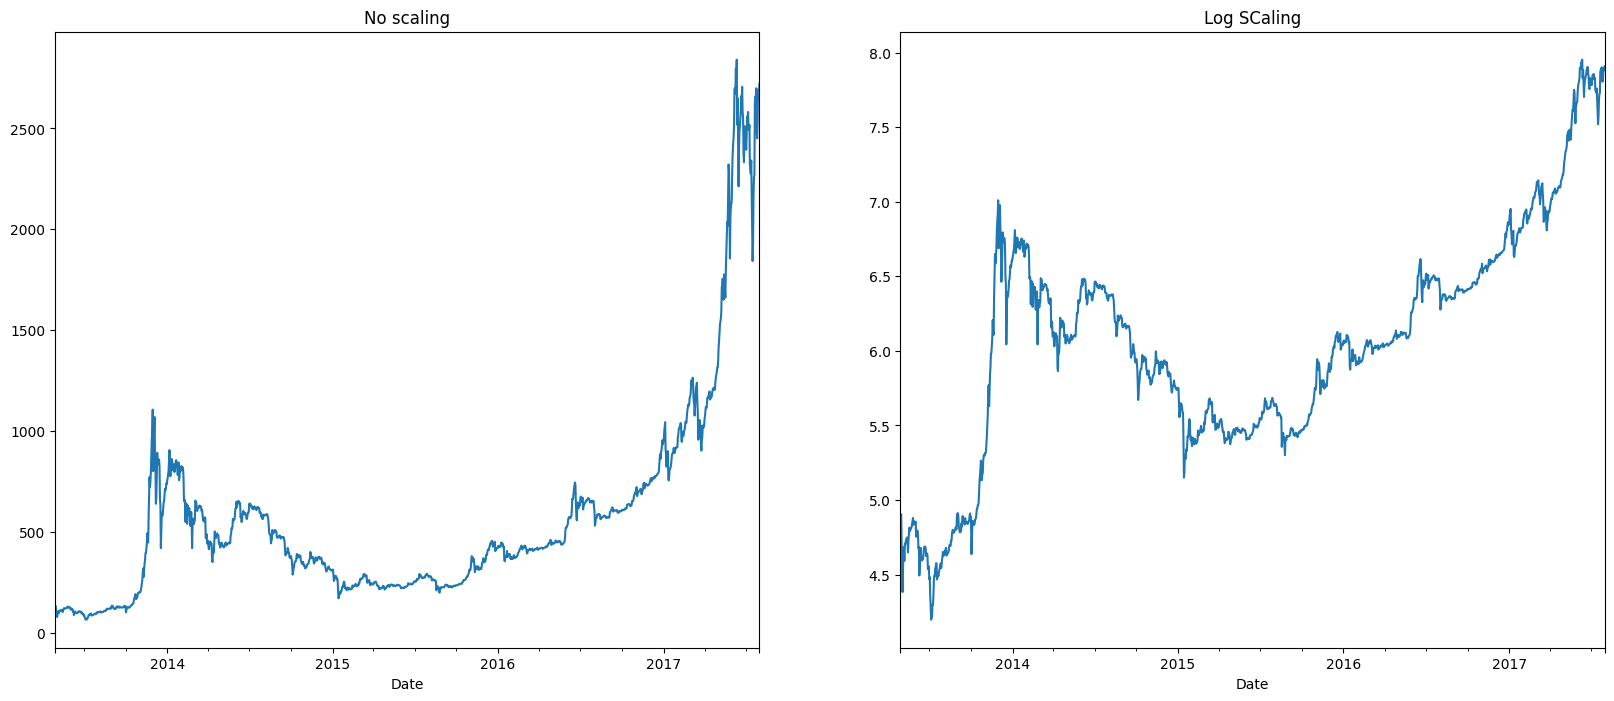

In [50]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df2['Low'].plot()
plt.title('No scaling')

plt.subplot(1,2,2)
np.log1p(df2['Low']).plot()
plt.title('Log SCaling')

# Analysing Closing Price on Yearly , Quaterly and Monthly basis

<AxesSubplot: xlabel='Date'>

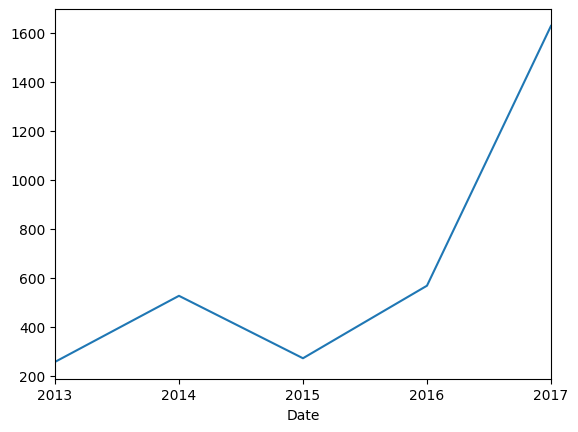

In [53]:
#Plottig average bitcoin price on yearly basis 
df2['Close'].resample('Y').mean().plot()

<AxesSubplot: xlabel='Date'>

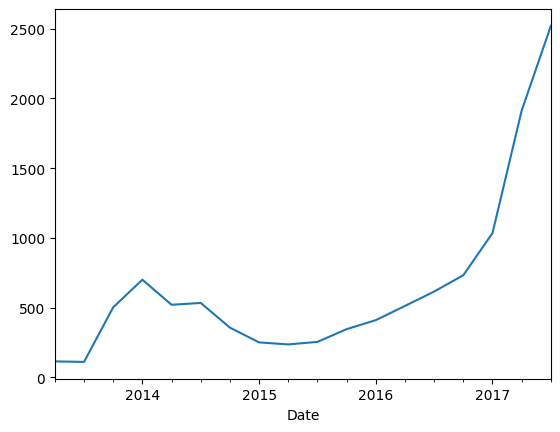

In [54]:
#Plottig average bitcoin price on quaterly basis 
df2['Close'].resample('Q').mean().plot()

<AxesSubplot: xlabel='Date'>

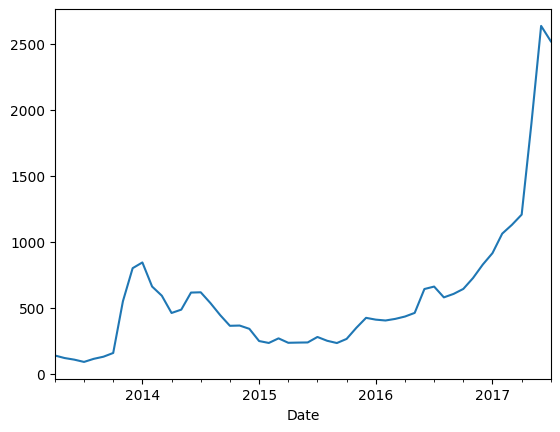

In [55]:
#Plottig average bitcoin price on monthly basis 
df2['Close'].resample('M').mean().plot()

# Conclusion of Analysis

1. Historical data reveals a significant decline in Bitcoin prices during the year 2015.

2. Following the second quarter of 2016, Bitcoin experienced a remarkable surge in its prices.

3. Over the period from 2013 to 2017, Bitcoin prices exhibited a substantial increase of approximately 150%.

4. Analysis of log-scaled graphs indicates a notable surge in Bitcoin prices in 2014 compared to the preceding year, 2013.

5. Bitcoin prices exhibited a consistent upward trend from 2015 to 2017.